# 0. Importing the Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import ast
from collections import deque
from datetime import timedelta

# 1. Downloading the Datasets

In [2]:
product_catalog = pd.read_csv("original_data/product_catalog.csv")
product_category = pd.read_csv("original_data/product_category_map.csv")
transactions = pd.read_csv("original_data/transactions.csv")
test = pd.read_csv("original_data/test.csv")

## 1a. Analyzing & Preprocessing the Dataset

Investigating the entities, dtypes, numeric information etc.

### <center> - Product Catalog DataFrame - </center>

In [3]:
product_catalog.head()

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]


In [4]:
product_catalog.describe()

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5
count,32776.000000,32776.000000,32776.000000,32776.000000,32776.000000,32776.000000,32776.000000
mean,16387.500000,702.776574,6.451062,0.817946,440.280388,0.804735,74.689285
std,9461.760548,432.774074,2.744884,0.778284,132.566994,1.354669,57.621143
min,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,8193.750000,322.000000,4.000000,0.000000,453.000000,0.000000,17.000000
50%,16387.500000,648.000000,6.000000,1.000000,491.000000,0.000000,66.000000
75%,24581.250000,1073.000000,10.000000,1.000000,509.000000,3.000000,126.000000
max,32775.000000,1513.000000,10.000000,3.000000,538.000000,4.000000,190.000000


In [5]:
product_catalog.isna().sum()

product_id            0
manufacturer_id       0
attribute_1           0
attribute_2           0
attribute_3           0
attribute_4           0
attribute_5           0
categories         6788
dtype: int64

In [6]:
product_catalog.shape

(32776, 8)

In [7]:
product_catalog.dtypes

product_id          int64
manufacturer_id     int64
attribute_1         int64
attribute_2         int64
attribute_3         int64
attribute_4         int64
attribute_5         int64
categories         object
dtype: object

In [8]:
product_catalog["categories"].nunique()

12191

In [9]:
product_catalog["categories"] = product_catalog['categories'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() != '' else [])

In [10]:
unique_categories = list()
for row in product_catalog["categories"]:
    for entity in row:
        if entity not in unique_categories:
            unique_categories.append(entity)

len(unique_categories)

3360

### <center> - Product Category - </center>

In [11]:
product_category.head()

,category_id,parent_category_id
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623


In [12]:
product_category.describe()

,category_id,parent_category_id
count,4332.000000,4332.000000
mean,2147.165512,2204.845568
std,1241.039814,1222.376330
min,0.000000,8.000000
25%,1069.750000,1143.750000
50%,2146.500000,2284.000000
75%,3221.250000,3329.000000
max,4299.000000,3898.000000


In [13]:
product_category.isna().sum()

category_id           0
parent_category_id    0
dtype: int64

In [14]:
product_category.dtypes

category_id           int64
parent_category_id    int64
dtype: object

In [15]:
product_catalog

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,[]
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]
...,...,...,...,...,...,...,...,...
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,..."
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]"
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]"
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]"


### <center> - Transactions - </center>

In [16]:
transactions.head()

,customer_id,product_id,purchase_date,quantity
0,38769,3477,2020-06-01,1
1,42535,30474,2020-06-01,1
2,42535,15833,2020-06-01,1
3,42535,20131,2020-06-01,1
4,42535,4325,2020-06-01,1


In [17]:
# Filter out rows in transactions where customer_id is not in test
transactions = transactions[transactions['customer_id'].isin(test['customer_id'])].reset_index(drop=True)

transactions.head()

,customer_id,product_id,purchase_date,quantity
0,44176,20159,2020-06-01,1
1,39433,197,2020-06-01,1
2,39433,29370,2020-06-01,1
3,3172,9649,2020-06-01,1
4,13085,1509,2020-06-01,1


In [18]:
transactions['purchase_date'] = pd.to_datetime(transactions['purchase_date'])

In [19]:
transactions

,customer_id,product_id,purchase_date,quantity
0,44176,20159,2020-06-01,1
1,39433,197,2020-06-01,1
2,39433,29370,2020-06-01,1
3,3172,9649,2020-06-01,1
4,13085,1509,2020-06-01,1
...,...,...,...,...
273788,36347,17658,2021-01-31,2
273789,17894,21280,2021-01-31,3
273790,17894,31268,2021-01-31,1
273791,10900,18270,2021-01-31,1


In [20]:
transactions.describe()

,customer_id,product_id,purchase_date,quantity
count,273793.000000,273793.000000,273793,273793.000000
mean,23084.185122,16487.366960,2020-10-04 14:57:28.646240256,1.399251
min,0.000000,1.000000,2020-06-01 00:00:00,1.000000
25%,11757.000000,8343.000000,2020-08-04 00:00:00,1.000000
50%,23095.000000,16879.000000,2020-10-05 00:00:00,1.000000
75%,34720.000000,24528.000000,2020-12-06 00:00:00,1.000000
max,46130.000000,32775.000000,2021-01-31 00:00:00,100.000000
std,13245.821228,9433.718025,NaN,1.457499


In [21]:
transactions.isna().sum()

customer_id      0
product_id       0
purchase_date    0
quantity         0
dtype: int64

In [22]:
transactions.dtypes

customer_id               int64
product_id                int64
purchase_date    datetime64[ns]
quantity                  int64
dtype: object

In [23]:
transactions.nunique()

customer_id       7251
product_id       20623
purchase_date      245
quantity            32
dtype: int64

In [24]:
# Sort by customer_id, product_id, and purchase_date
transactions = transactions.sort_values(by=['customer_id', 'product_id', 'purchase_date'])

In [25]:
transactions.head()

,customer_id,product_id,purchase_date,quantity
99920,0,1505,2020-09-01,1
211259,0,6446,2020-12-11,1
251491,0,6446,2021-01-15,1
183150,0,9325,2020-11-20,1
67740,0,12468,2020-08-03,1


In [26]:
unique_customers = transactions['customer_id'].nunique()
print("Number of unique customers:", unique_customers)

Number of unique customers: 7251


In [27]:
clustered_products = pd.read_csv("updated_product_catalog.csv")
clustered_products.head()
clustered_products

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,categories_length,parent_categories,combined_categories,cluster,combined_cluster
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]",4,"[2832, 1178, 3898, 3898]","[3908, 3909, 2890, 2832, 855, 1178, 3898]",0,0
1,28640,1366,10,1,537,0,101,[],0,[],[],-1,-1
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3...",13,"[1420, 3860, 600, 600, 3241, 3241, 3241, 600, ...","[163, 3270, 3912, 3561, 3913, 3595, 12, 3914, ...",-1,-1
3,21399,1090,10,1,511,0,0,[3270],1,[1420],"[1420, 3270]",1,1
4,8504,768,4,1,484,0,66,[2470],1,[2566],"[2470, 2566]",2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,...",11,"[3860, 458, 458, 458, 458, 322, 600, 600, 600,...","[1088, 322, 2308, 3688, 3241, 458, 12, 3502, 6...",2047,2402
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]",8,"[3898, 3898, 3898, 3898, 1072, 2920, 2475, 3565]","[3905, 3910, 2920, 2475, 3565, 1807, 1072, 274...",20,-1
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]",3,"[2917, 1175, 725, 1735]","[2917, 1735, 2609, 725, 1175, 2686]",386,417
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]",6,"[3898, 3898, 3898, 2566, 3565, 2920]","[3910, 2566, 2920, 2473, 3565, 914, 274, 3898,...",1418,-1


In [28]:
merged_df = transactions.merge(clustered_products[['product_id', 'cluster']], on='product_id', how='left')

# Dropping the original product_id column and renaming cluster as cluster_id
merged_df = merged_df.rename(columns={'cluster': 'cluster_id'})

merged_df

,customer_id,product_id,purchase_date,quantity,cluster_id
0,0,1505,2020-09-01,1,709
1,0,6446,2020-12-11,1,293
2,0,6446,2021-01-15,1,293
3,0,9325,2020-11-20,1,-1
4,0,12468,2020-08-03,1,193
...,...,...,...,...,...
273788,46130,29288,2020-11-28,1,919
273789,46130,29499,2020-11-28,1,1322
273790,46130,29995,2020-12-10,1,1013
273791,46130,30712,2020-08-19,1,193


In [29]:
# Sort by customer_id, product_id, and purchase_date
merged_df = merged_df.sort_values(by=['customer_id', 'cluster_id', 'purchase_date'])

In [30]:
merged_df.drop(columns=['product_id'], inplace=True)

In [31]:
merged_df['next_purchase_date'] = merged_df.groupby(['customer_id', 'cluster_id'])['purchase_date'].shift(-1)
# merged_df['next_purchase_date'] = merged_df.groupby(['customer_id', 'product_id'])['purchase_date'].shift(-1)
merged_df

,customer_id,purchase_date,quantity,cluster_id,next_purchase_date
5,0,2020-08-18,1,-1,2020-11-20
3,0,2020-11-20,1,-1,NaT
8,0,2020-06-05,1,3,2020-10-09
9,0,2020-10-09,1,3,2020-12-11
10,0,2020-12-11,1,3,NaT
...,...,...,...,...,...
273777,46130,2020-07-10,1,1354,NaT
273787,46130,2020-11-28,1,1606,NaT
273766,46130,2020-08-23,1,1643,2020-11-28
273767,46130,2020-11-28,1,1643,NaT


In [32]:
merged_df['re_purchased_week'] = ((1 + (merged_df['next_purchase_date'] - merged_df['purchase_date']).dt.days / 7) / merged_df['quantity']).fillna(0).astype(int)
merged_df.head()

,customer_id,purchase_date,quantity,cluster_id,next_purchase_date,re_purchased_week
5,0,2020-08-18,1,-1,2020-11-20,14
3,0,2020-11-20,1,-1,NaT,0
8,0,2020-06-05,1,3,2020-10-09,19
9,0,2020-10-09,1,3,2020-12-11,10
10,0,2020-12-11,1,3,NaT,0


In [33]:
max_purchase_date = merged_df['purchase_date'].max()

# Calculating the cutoff date (4 weeks before max_purchase_date) to drop
cutoff_date = max_purchase_date - timedelta(weeks=3)

# Filter the last row of each customer-product pair
filtered_transactions = merged_df.sort_values(by=['customer_id', 'cluster_id', 'purchase_date'])
last_rows = filtered_transactions.drop_duplicates(subset=['customer_id', 'cluster_id'], keep='last')
filtered_transactions = filtered_transactions[~filtered_transactions.index.isin(last_rows.index)]

filtered_transactions

,customer_id,purchase_date,quantity,cluster_id,next_purchase_date,re_purchased_week
5,0,2020-08-18,1,-1,2020-11-20,14
8,0,2020-06-05,1,3,2020-10-09,19
9,0,2020-10-09,1,3,2020-12-11,10
12,0,2020-11-20,1,38,2020-12-11,4
13,0,2020-12-11,1,38,2021-01-25,7
...,...,...,...,...,...,...
273770,46130,2020-10-23,2,310,2020-12-14,4
273783,46130,2020-08-23,1,322,2020-12-14,17
273784,46130,2020-12-14,1,322,2021-01-27,7
273786,46130,2020-12-10,1,1013,2020-12-10,1


In [34]:
new_df = merged_df.drop(columns=['purchase_date', 'next_purchase_date'])
new_df.head()

,customer_id,quantity,cluster_id,re_purchased_week
5,0,1,-1,14
3,0,1,-1,0
8,0,1,3,19
9,0,1,3,10
10,0,1,3,0


In [35]:
new_df[new_df["quantity"] == 1].re_purchased_week.unique()

array([14,  0, 19, 10,  4,  7,  6,  5,  1,  2,  8, 21, 12, 16, 30,  3, 23,
       18, 11, 15, 13, 32, 26, 20,  9, 22, 31, 17, 34, 28, 27, 24, 25, 29,
       35, 33])

In [36]:
# Counting the occurrences of each re_purchased_week value
counts = new_df['re_purchased_week'].value_counts()

# Creating a new DataFrame to include weeks from 0 to 4
re_purchased_df = pd.DataFrame({'re_purchased_week': range(6), 'count': 0})
re_purchased_df.set_index('re_purchased_week', inplace=True)

# Updating the counts for weeks that exist in the data
for week, count in counts.items():
    if week in re_purchased_df.index:
        re_purchased_df.at[week, 'count'] = count

    elif week > 5:
        re_purchased_df.at[5, 'count'] += count

# Calculating the percentages
total_counts = re_purchased_df['count'].sum()
re_purchased_df['percentage'] = (re_purchased_df['count'] / total_counts * 100).round(2)

# Resetting index to make it more readable
final_df = re_purchased_df.reset_index()
final_df


,re_purchased_week,count,percentage
0,0,135572,49.52
1,1,55667,20.33
2,2,12697,4.64
3,3,10790,3.94
4,4,9385,3.43
5,5,49682,18.15


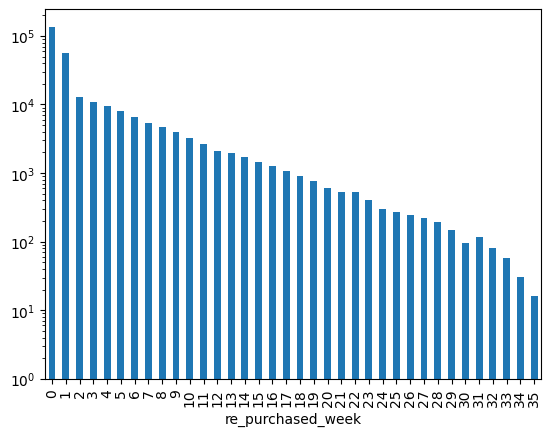

In [37]:
merged_df["re_purchased_week"].value_counts().sort_index().plot(kind="bar", log=True);

In [38]:
final_df.describe()

,re_purchased_week,count,percentage
count,6.000000,6.000000,6.000000
mean,2.500000,45632.166667,16.668333
std,1.870829,48618.579829,17.758265
min,0.000000,9385.000000,3.430000
25%,1.250000,11266.750000,4.115000
50%,2.500000,31189.500000,11.395000
75%,3.750000,54170.750000,19.785000
max,5.000000,135572.000000,49.520000


# <center> Merging the Datasets </center>

In [39]:
new_df

,customer_id,quantity,cluster_id,re_purchased_week
5,0,1,-1,14
3,0,1,-1,0
8,0,1,3,19
9,0,1,3,10
10,0,1,3,0
...,...,...,...,...
273777,46130,1,1354,0
273787,46130,1,1606,0
273766,46130,1,1643,14
273767,46130,1,1643,0


In [40]:
average_repurchased_week = new_df.groupby(['customer_id', 'cluster_id'])['re_purchased_week'].transform(lambda x: x.sum() / (len(x) - 1) if len(x) > 1 else 0)

# Adding a new column for average_repurchased_week
new_df['average_repurchased_week'] = average_repurchased_week

new_df

,customer_id,quantity,cluster_id,re_purchased_week,average_repurchased_week
5,0,1,-1,14,14.0
3,0,1,-1,0,14.0
8,0,1,3,19,14.5
9,0,1,3,10,14.5
10,0,1,3,0,14.5
...,...,...,...,...,...
273777,46130,1,1354,0,0.0
273787,46130,1,1606,0,0.0
273766,46130,1,1643,14,14.0
273767,46130,1,1643,0,14.0


In [41]:
new_df['total_transactions'] = new_df.groupby('customer_id')['customer_id'].transform('count')
new_df

,customer_id,quantity,cluster_id,re_purchased_week,average_repurchased_week,total_transactions
5,0,1,-1,14,14.0,18
3,0,1,-1,0,14.0,18
8,0,1,3,19,14.5,18
9,0,1,3,10,14.5,18
10,0,1,3,0,14.5,18
...,...,...,...,...,...,...
273777,46130,1,1354,0,0.0,39
273787,46130,1,1606,0,0.0,39
273766,46130,1,1643,14,14.0,39
273767,46130,1,1643,0,14.0,39


In [42]:
new_df['average_unit_per_transaction'] = new_df.groupby('customer_id')['quantity'].transform('mean')
new_df

,customer_id,quantity,cluster_id,re_purchased_week,average_repurchased_week,total_transactions,average_unit_per_transaction
5,0,1,-1,14,14.0,18,1.111111
3,0,1,-1,0,14.0,18,1.111111
8,0,1,3,19,14.5,18,1.111111
9,0,1,3,10,14.5,18,1.111111
10,0,1,3,0,14.5,18,1.111111
...,...,...,...,...,...,...,...
273777,46130,1,1354,0,0.0,39,1.307692
273787,46130,1,1606,0,0.0,39,1.307692
273766,46130,1,1643,14,14.0,39,1.307692
273767,46130,1,1643,0,14.0,39,1.307692


In [43]:
new_df['new_column'] = new_df["re_purchased_week"].apply(lambda x: 1 if x in [1,2,3,4] else 0)
new_df.head()

,customer_id,quantity,cluster_id,re_purchased_week,average_repurchased_week,total_transactions,average_unit_per_transaction,new_column
5,0,1,-1,14,14.0,18,1.111111,0
3,0,1,-1,0,14.0,18,1.111111,0
8,0,1,3,19,14.5,18,1.111111,0
9,0,1,3,10,14.5,18,1.111111,0
10,0,1,3,0,14.5,18,1.111111,0


In [44]:
new_df.to_csv("new_df.csv", index=False)

In [45]:
from catboost import CatBoostRegressor, CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import root_mean_squared_error, accuracy_score

In [46]:
# Specify categorical features
categorical_features = ['cluster_id']

# Separate features (X) and target (y)
X = new_df.drop(columns=['new_column', 're_purchased_week', 'customer_id', 'quantity'])
y = new_df['new_column']

# Initialize KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Store metrics for each fold
fold_metrics = []

for train_index, val_index in skf.split(X, y):
    # Split data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Create CatBoost Pools
    train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
    val_pool = Pool(data=X_val, label=y_val, cat_features=categorical_features)
    
    # Initialize and train CatBoostClassifier
    boostmodel = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=0)
    boostmodel.fit(train_pool)
    
    # Predict on validation set
    y_pred = boostmodel.predict(val_pool)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_val, y_pred)
    fold_metrics.append(accuracy)

# Output average accuracy across all folds
print(f"Average Accuracy: {sum(fold_metrics) / len(fold_metrics):.4f}")

Average Accuracy: 0.8123


In [48]:
# Specify categorical features
categorical_features = ['cluster_id']

deneme = new_df[(new_df["re_purchased_week"] > 0) & (new_df["re_purchased_week"] < 5)]
# Separate features (X) and target (y)
X = deneme.drop(columns=['new_column', 're_purchased_week', 'customer_id', 'quantity'])
y = deneme['re_purchased_week']

# Initialize KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Store metrics for each fold
fold_metrics = []

for train_index, val_index in skf.split(X, y):
    # Split data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Create CatBoost Pools
    train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
    val_pool = Pool(data=X_val, label=y_val, cat_features=categorical_features)

    # Initialize and train CatBoostClassifier
    subboostmodel = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, loss_function='MultiClass', verbose=0)
    subboostmodel.fit(train_pool)

    # Predict on validation set
    y_pred = subboostmodel.predict(val_pool)

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_val, y_pred)
    fold_metrics.append(accuracy)

# Output average accuracy across all folds
print(f"Average Accuracy: {sum(fold_metrics) / len(fold_metrics):.4f}")

Average Accuracy: 0.6604


In [ ]:
# Load the test data
test_data = pd.read_csv("test_with_new_df.csv")

test_data.drop_duplicates(inplace=True)

# Prepare the test features
X_test = test_data.drop(columns=['id', 'customer_id', 'product_id', 'prediction'])

# Create CatBoost Pool for test data
test_pool = Pool(data=X_test, cat_features=categorical_features)

# Make predictions on the test data
test_predictions = boostmodel.predict(test_pool)

# Add predictions to the test data
test_data['prediction'] = test_predictions

# Save the test data with predictions to a new CSV file
test_data.to_csv("test_with_predictions.csv", index=False)

# Display the first few rows of the test data with predictions
test_data.head()

,id,customer_id,product_id,prediction,cluster_id,average_repurchased_week,average_unit_per_transaction,total_transactions
0,0,0,20664,0,3,14.500000,1.111111,18
3,1,0,28231,0,38,5.500000,1.111111,18
6,2,13,2690,0,322,10.000000,1.340000,50
10,3,15,1299,0,20,4.200000,1.265306,49
16,4,15,20968,1,-1,2.916667,1.265306,49


In [ ]:
# Remove rows where prediction is 0 or cluster_id is -1
filtered_test_df = test_data[(test_data['prediction'] != 0) & (test_data['cluster_id'] != -1)]
filtered_test_df.head()

,id,customer_id,product_id,prediction,cluster_id,average_repurchased_week,average_unit_per_transaction,total_transactions
414,62,240,11556,1,1232,1.000000,1.000000,50
1127,140,678,17662,1,1014,2.888889,1.724138,58
1145,143,689,29048,1,1988,2.500000,1.328358,67
1352,171,873,24795,1,99,3.400000,1.357143,70
1664,218,1169,19816,1,288,3.000000,1.441176,34


In [ ]:
# Prepare the test features for subboostmodel
X_filtered_test = filtered_test_df.drop(columns=['id', 'customer_id', 'prediction'])

# Create CatBoost Pool for filtered test data
filtered_test_pool = Pool(data=X_filtered_test, cat_features=categorical_features)

# Make predictions on the filtered test data using subboostmodel
filtered_test_predictions = subboostmodel.predict(filtered_test_pool)

# Add predictions to the filtered test data
filtered_test_df['subboostmodel_prediction'] = filtered_test_predictions

# Display the first few rows of the filtered test data with predictions
filtered_test_df.head()

/var/folders/s8/dtkxhqdx0d1c4g1_95ztsf0c0000gn/T/ipykernel_29264/4160508602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_df['subboostmodel_prediction'] = filtered_test_predictions


,id,customer_id,product_id,prediction,cluster_id,average_repurchased_week,average_unit_per_transaction,total_transactions,subboostmodel_prediction
414,62,240,11556,1,1232,1.000000,1.000000,50,1
1127,140,678,17662,1,1014,2.888889,1.724138,58,1
1145,143,689,29048,1,1988,2.500000,1.328358,67,1
1352,171,873,24795,1,99,3.400000,1.357143,70,1
1664,218,1169,19816,1,288,3.000000,1.441176,34,3


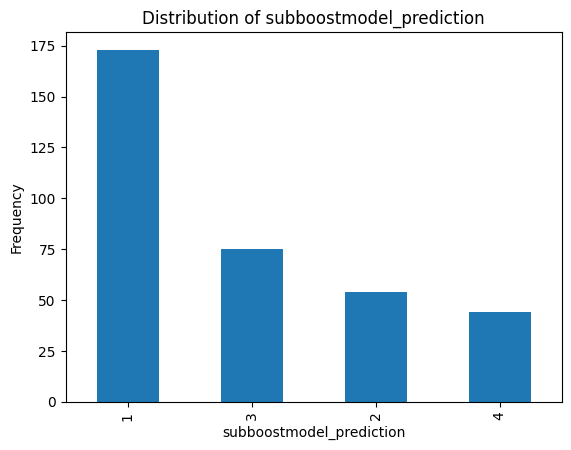

In [ ]:
# Get the distribution of subboostmodel_prediction
subboostmodel_prediction_distribution = filtered_test_df['subboostmodel_prediction'].value_counts()

# Plot the distribution
subboostmodel_prediction_distribution.plot(kind='bar', title='Distribution of subboostmodel_prediction')
plt.xlabel('subboostmodel_prediction')
plt.ylabel('Frequency')
plt.show()

In [ ]:
filtered_test_df

,id,customer_id,product_id,prediction,cluster_id,average_repurchased_week,average_unit_per_transaction,total_transactions,subboostmodel_prediction
414,62,240,11556,1,1232,1.000000,1.000000,50,1
1127,140,678,17662,1,1014,2.888889,1.724138,58,1
1145,143,689,29048,1,1988,2.500000,1.328358,67,1
1352,171,873,24795,1,99,3.400000,1.357143,70,1
1664,218,1169,19816,1,288,3.000000,1.441176,34,3
...,...,...,...,...,...,...,...,...,...
91644,9882,45594,24943,1,193,2.928571,1.112150,107,1
91699,9884,45594,31209,1,193,2.928571,1.112150,107,1
91884,9907,45704,8772,1,378,3.200000,1.333333,63,3
92259,9956,45924,14833,1,950,2.750000,1.298507,67,2


In [ ]:
yetim = test_data[~((test_data['prediction'] != 0) & (test_data['cluster_id'] != -1))]
yetim['prediction'] = 0
yetim['subboostmodel_prediction'] = 0
yetim

/var/folders/s8/dtkxhqdx0d1c4g1_95ztsf0c0000gn/T/ipykernel_29264/2866027369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yetim['prediction'] = 0
/var/folders/s8/dtkxhqdx0d1c4g1_95ztsf0c0000gn/T/ipykernel_29264/2866027369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yetim['subboostmodel_prediction'] = 0


,id,customer_id,product_id,prediction,cluster_id,average_repurchased_week,average_unit_per_transaction,total_transactions,subboostmodel_prediction
0,0,0,20664,0,3,14.500000,1.111111,18,0
3,1,0,28231,0,38,5.500000,1.111111,18,0
6,2,13,2690,0,322,10.000000,1.340000,50,0
10,3,15,1299,0,20,4.200000,1.265306,49,0
16,4,15,20968,0,-1,2.916667,1.265306,49,0
...,...,...,...,...,...,...,...,...,...
92686,9995,46118,20106,0,122,6.500000,1.577778,45,0
92691,9996,46124,19677,0,1923,5.600000,1.032258,31,0
92697,9997,46125,12878,0,419,18.000000,1.062500,16,0
92700,9998,46127,7963,0,549,6.500000,1.440000,25,0


In [ ]:
yetim["prediction"] = 0
yetim

/var/folders/s8/dtkxhqdx0d1c4g1_95ztsf0c0000gn/T/ipykernel_29264/2408765543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yetim["prediction"] = 0


,id,customer_id,product_id,prediction,cluster_id,average_repurchased_week,average_unit_per_transaction,total_transactions,subboostmodel_prediction
0,0,0,20664,0,3,14.500000,1.111111,18,0
3,1,0,28231,0,38,5.500000,1.111111,18,0
6,2,13,2690,0,322,10.000000,1.340000,50,0
10,3,15,1299,0,20,4.200000,1.265306,49,0
16,4,15,20968,0,-1,2.916667,1.265306,49,0
...,...,...,...,...,...,...,...,...,...
92686,9995,46118,20106,0,122,6.500000,1.577778,45,0
92691,9996,46124,19677,0,1923,5.600000,1.032258,31,0
92697,9997,46125,12878,0,419,18.000000,1.062500,16,0
92700,9998,46127,7963,0,549,6.500000,1.440000,25,0


In [ ]:
combined_df = pd.concat([yetim, filtered_test_df], ignore_index=True)
combined_df

,id,customer_id,product_id,prediction,cluster_id,average_repurchased_week,average_unit_per_transaction,total_transactions,subboostmodel_prediction
0,0,0,20664,0,3,14.500000,1.111111,18,0
1,1,0,28231,0,38,5.500000,1.111111,18,0
2,2,13,2690,0,322,10.000000,1.340000,50,0
3,3,15,1299,0,20,4.200000,1.265306,49,0
4,4,15,20968,0,-1,2.916667,1.265306,49,0
...,...,...,...,...,...,...,...,...,...
9995,9882,45594,24943,1,193,2.928571,1.112150,107,1
9996,9884,45594,31209,1,193,2.928571,1.112150,107,1
9997,9907,45704,8772,1,378,3.200000,1.333333,63,3
9998,9956,45924,14833,1,950,2.750000,1.298507,67,2


In [ ]:
# Sort the combined_df by id
combined_df = combined_df.sort_values(by='id')

# Drop columns other than id, customer_id, product_id, subboostmodel_prediction
combined_df = combined_df[['id', 'customer_id', 'product_id', 'subboostmodel_prediction']]

# Rename the subboostmodel_prediction column to prediction
combined_df = combined_df.rename(columns={'subboostmodel_prediction': 'prediction'})

combined_df.head()

,id,customer_id,product_id,prediction
0,0,0,20664,0
1,1,0,28231,0
2,2,13,2690,0
3,3,15,1299,0
4,4,15,20968,0


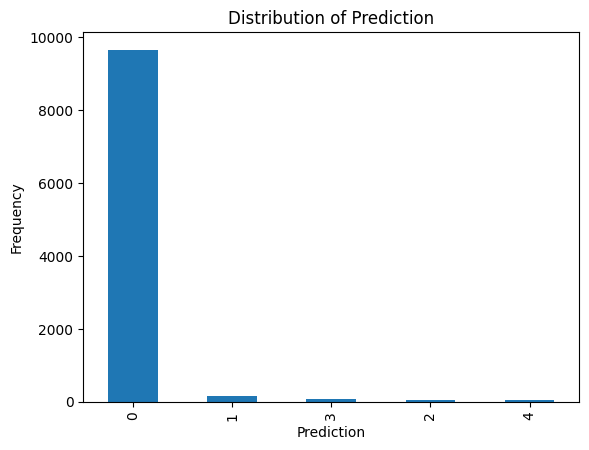

In [ ]:
# Get the distribution of the prediction column
prediction_distribution = combined_df['prediction'].value_counts()

# Plot the distribution
prediction_distribution.plot(kind='bar', title='Distribution of Prediction')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.show()

In [ ]:
combined_df.to_csv("combined_df.csv", index=False)